In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"housing.xlsx")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


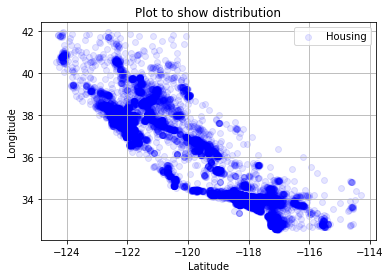

In [3]:
plt.scatter(df.longitude, df.latitude, color = "b", alpha = 0.1, label = "Housing")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Plot to show distribution")
plt.legend()
plt.grid()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

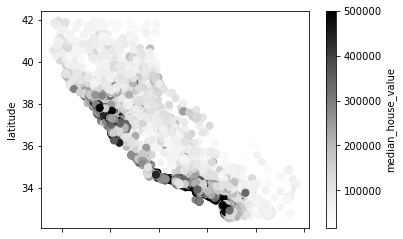

In [21]:
#df.plot.scatter(x = "x", y = "y", c = "c", s = 50)
df.plot.scatter(x='longitude', y='latitude', c='median_house_value', s = 50)

In [5]:
df = df.dropna()
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
train_set, test_set = train_test_split(df, test_size=0.2,  random_state = 42)
y_train = train_set.iloc[:, -2:-1]
x_train = train_set.iloc[:, 0:8]
y_test = test_set.iloc[:, -2:-1]
x_test = test_set.iloc[:, 0:8]

In [7]:
def plot_data(y_predict, y_test, lat_long):
    
    temp = pd.DataFrame({
      "Predicted": y_predict.ravel(),
      "Actual": y_test.to_numpy().ravel(), 
      "pos": lat_long["longitude"].astype(str) + "," + lat_long["latitude"].astype(str)})
    temp = temp.sort_values(by=['pos'])
    plt.figure(figsize = (20, 20))
    plt.plot(temp.pos[0:50], temp.Predicted[0:50], label = "Predicted", color = "b", marker = "o")
    plt.plot(temp.pos[0:50], temp.Actual[0:50], label = "Actual", color = "r", marker = "^")
    plt.ylabel("Price")
    plt.xlabel("Lat Long")
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.title("Comparison Between Actual Value and Predicted")
    plt.grid()

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


70025.94402055605


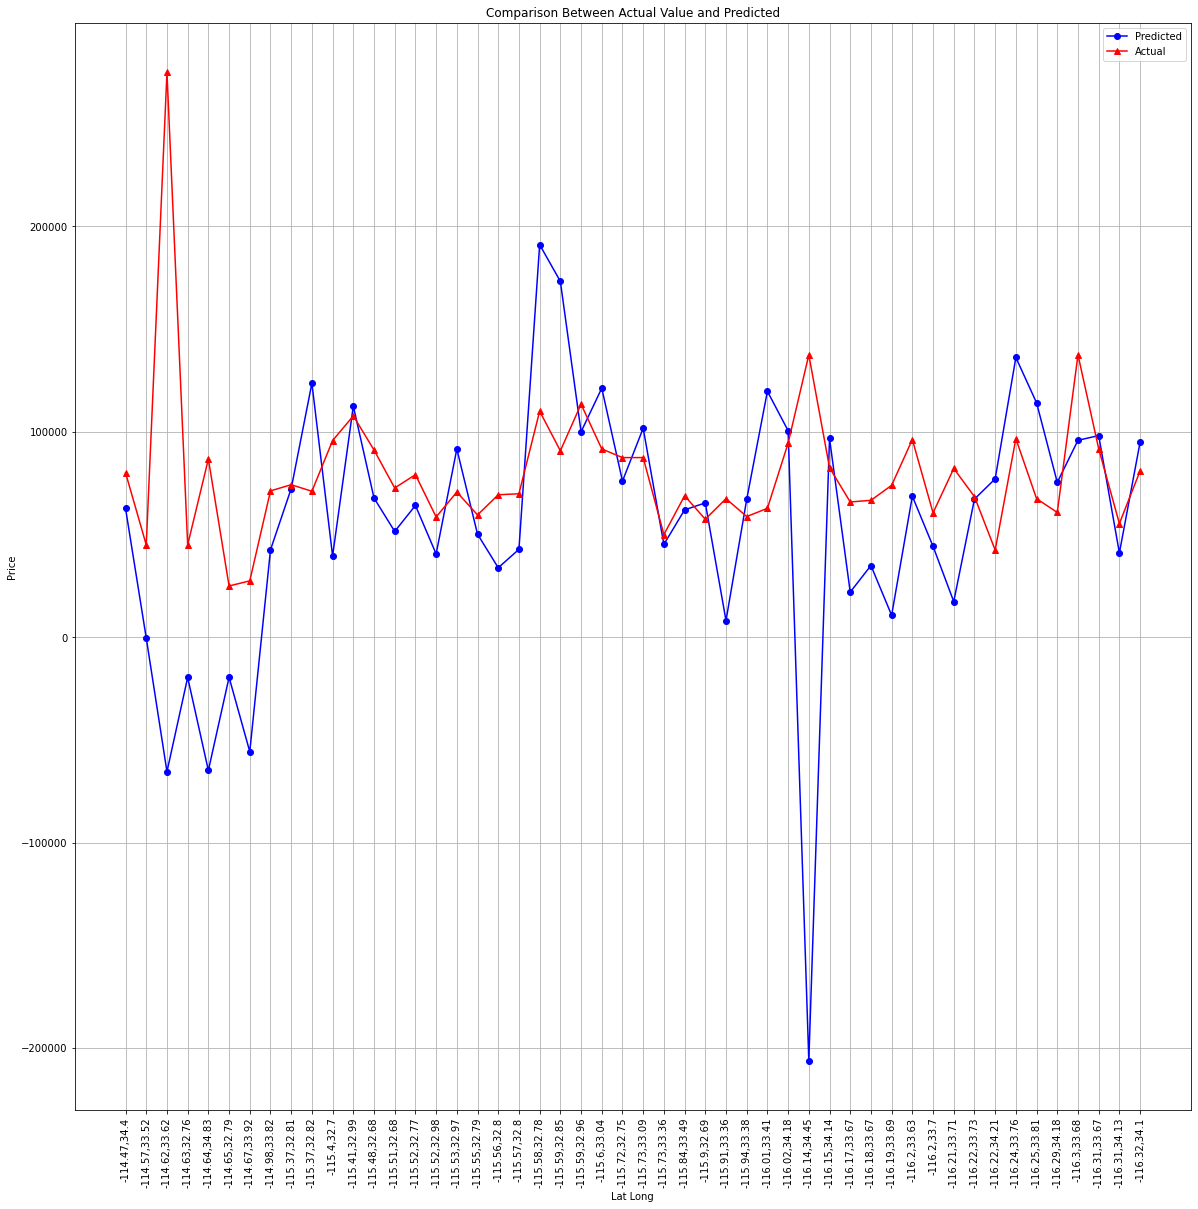

In [9]:
from sklearn.linear_model import LinearRegression

score = []
rmse = []
i = 0

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
rmse.append(mean_squared_error(y_predict, y_test, squared = False))
print(rmse[i])
score.append(cross_val_score(model, x_train, y_train))
plot_data(y_predict, y_test, x_test[["longitude", "latitude"]])

In [10]:
print(df.ocean_proximity.unique())
label = LabelEncoder()
df["label"] = label.fit_transform(df.ocean_proximity)
df = df.drop(["ocean_proximity"], axis = 1)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


<ipython-input-10-bdab91cbcd62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = label.fit_transform(df.ocean_proximity)


In [11]:
train_set, test_set = train_test_split(df, test_size=0.2,  random_state = 42)
x_train = pd.concat([train_set.iloc[:, 0:8], train_set.iloc[:,[9]]], axis = 1)
y_train = train_set.iloc[:, -2:-1]
x_test = pd.concat([test_set.iloc[:, 0:8], test_set.iloc[:,[9]]], axis = 1)
y_test = test_set.iloc[:, -2:-1]

70025.94402055605


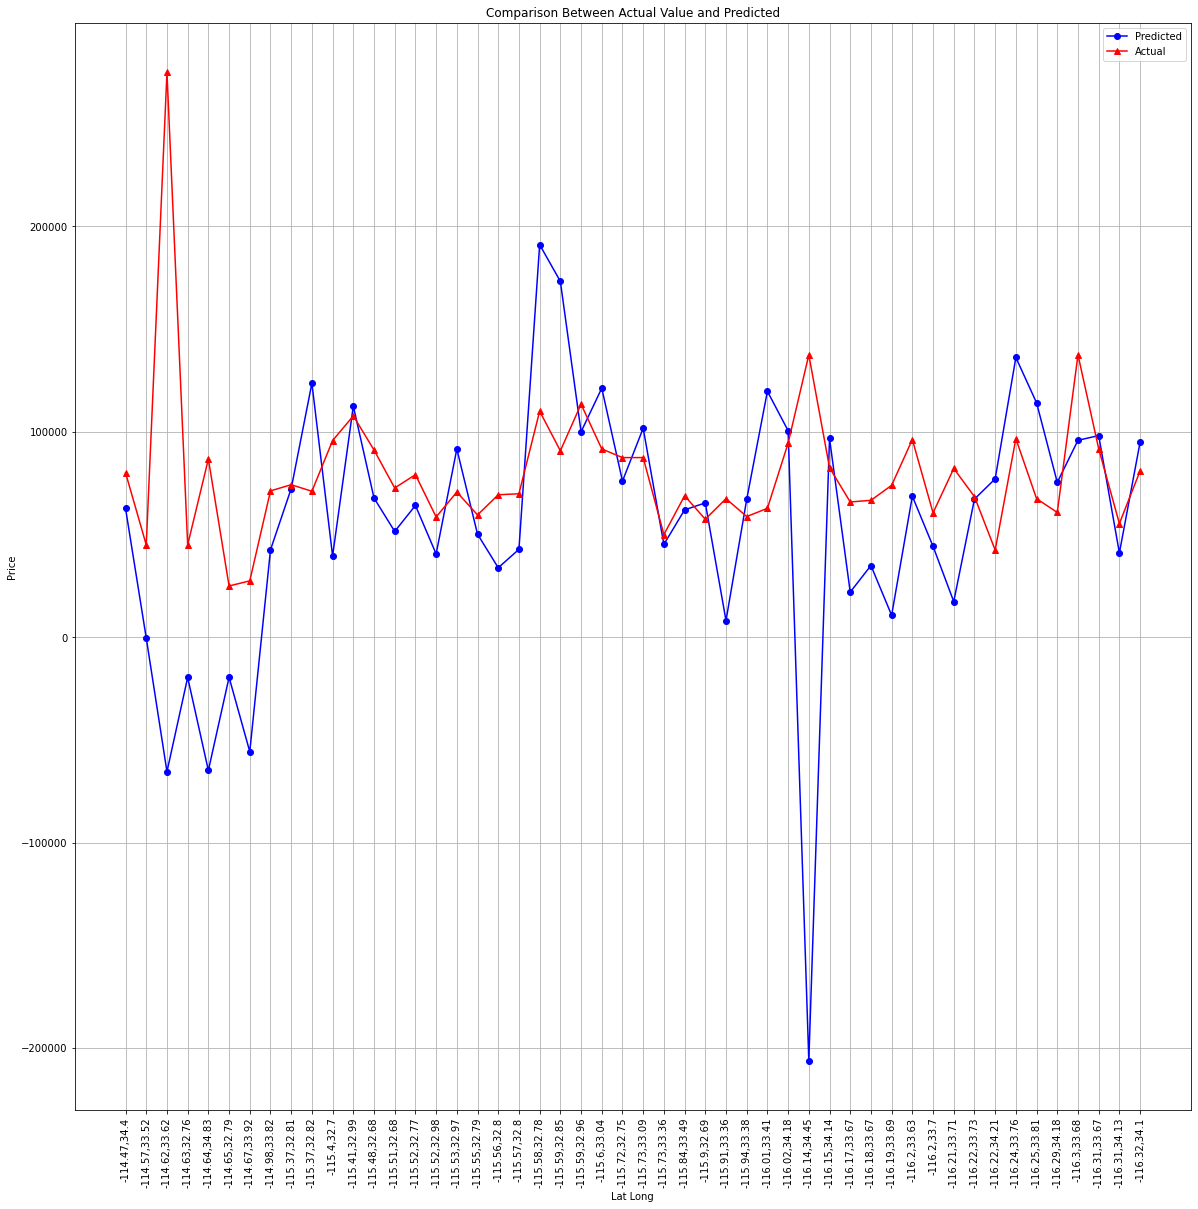

In [12]:
i += 1

model = LinearRegression()
model.fit(x_train, y_train)
y_predictc= model.predict(x_test)
rmse.append(mean_squared_error(y_predict, y_test, squared = False))
print(rmse[i])
score.append(cross_val_score(model, x_train, y_train))
plot_data(y_predict, y_test, x_test[["longitude", "latitude"]])

68997.64853102683


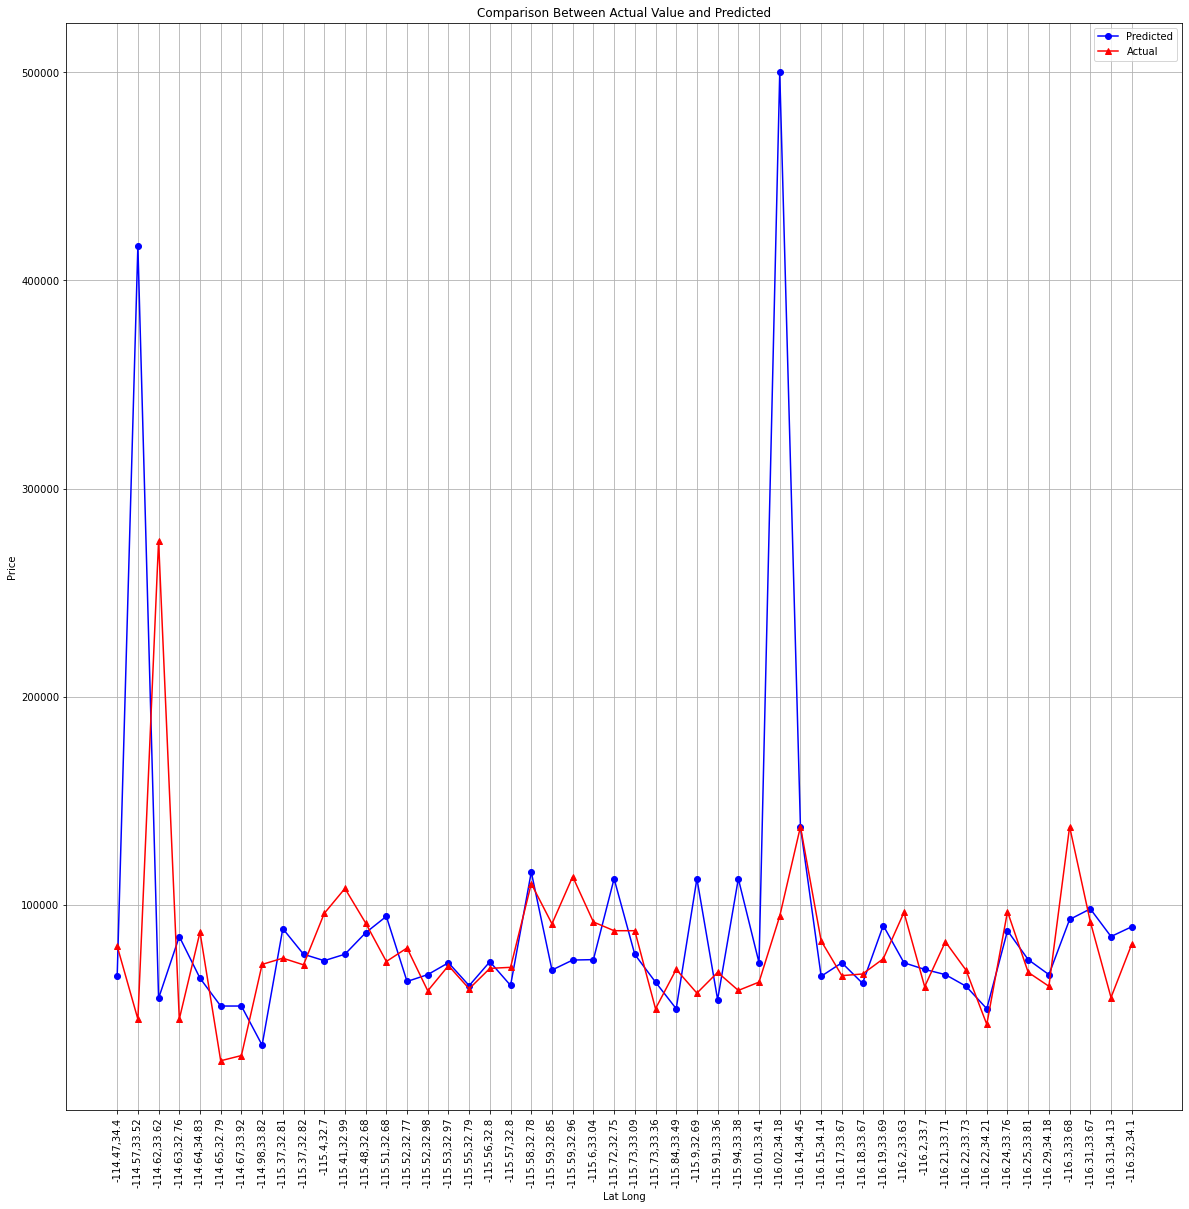

In [13]:
from sklearn.tree import DecisionTreeRegressor

i += 1

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
rmse.append(mean_squared_error(y_predict, y_test, squared = False))
print(rmse[i])
score.append(cross_val_score(model, x_train, y_train))
plot_data(y_predict, y_test, x_test[["longitude", "latitude"]])

<ipython-input-14-a9395891de88>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


49668.238136240136


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

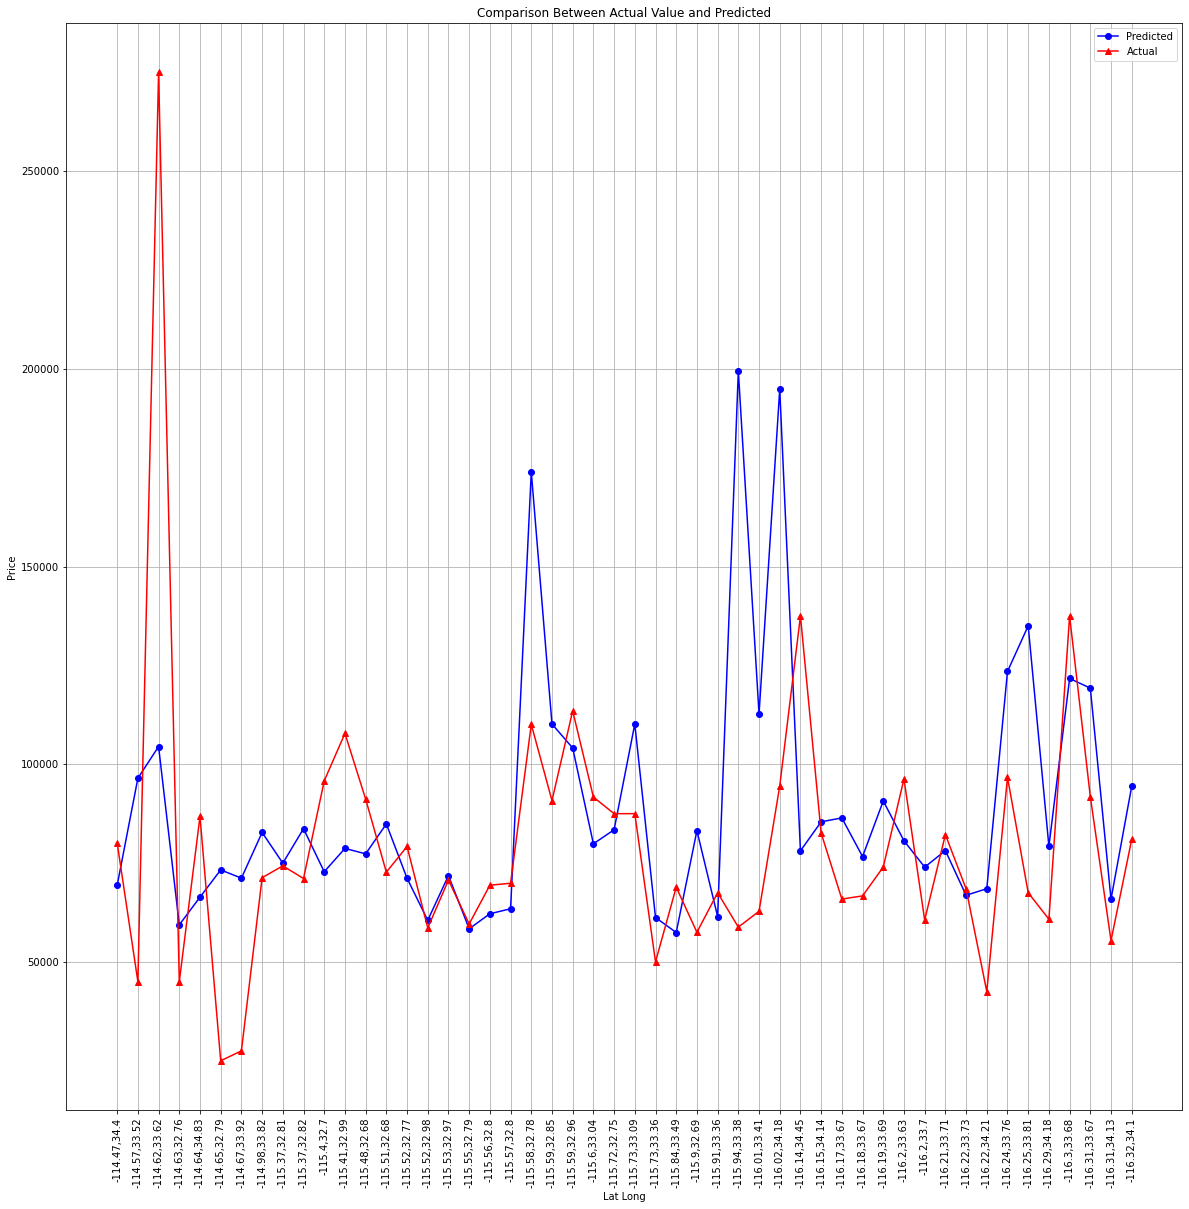

In [14]:
from sklearn.ensemble import RandomForestRegressor

i += 1

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
rmse.append(mean_squared_error(y_predict, y_test, squared = False))
print(rmse[i])
score.append(cross_val_score(model, x_train, y_train))
plot_data(y_predict, y_test, x_test[["longitude", "latitude"]])

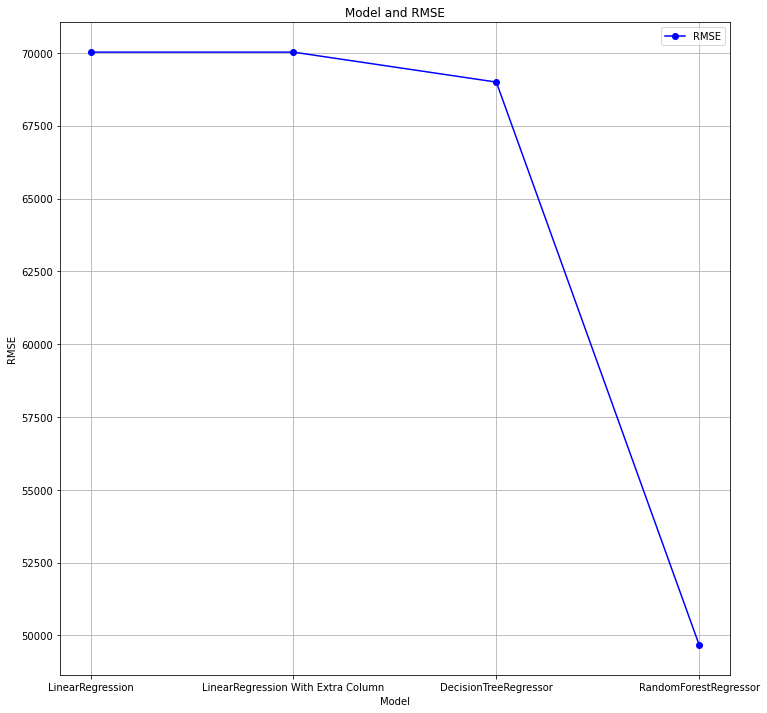

In [15]:
model = ["LinearRegression", "LinearRegression With Extra Column", "DecisionTreeRegressor", "RandomForestRegressor"]
plt.figure(figsize = (12, 12))
plt.plot(model, rmse, label = "RMSE", color = "b", marker = "o")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.legend()
plt.title("Model and RMSE")
plt.grid()